# ENEXIS Graduation Project

####  EDA of PV installed capacity

### Contents

#### Characteristics of Loon op Zand - demographic features vs installed PV by buurt
   * [1. Reading of PV installed capacity & demographics dataset](#readpv)
   * [2. Selection of a specific municipality to focus on : Loon](#selbest)
   * [3. Demographic characteristics of Loon by buurt](#dembest)

#### PV installed capacity  - development in time in Loon op Zand by buurt
  
   * [1. Total number of installations as function of time](#total)
   * [2. Percentage of privately owned houses](#koop)
   * [3. Percentage of one family houses](#een)
   * [4. Housholds with PV per 100 households in 2022](#pv2022)
   * [5. Province](#prov)
   * [6. Average electricity consumption](#elec)

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import cbsodata
pd.options.mode.chained_assignment = None  # default='warn'

<a id='readpv'></a>
#### 1. Reading of PV installed capacity & demographics dataset

In [2]:
c_path = "./data/"
v_file = "PV installed capacity & demographics"

In [3]:
df     = pd.read_csv(filepath_or_buffer = c_path + v_file + ".csv",
                      encoding           = 'UTF-8')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31121 entries, 0 to 31120
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       31121 non-null  object 
 1   BU_2021                                    31121 non-null  object 
 2   BU_NAAM                                    31121 non-null  object 
 3   WK_2021                                    31121 non-null  object 
 4   WK_NAAM                                    31121 non-null  object 
 5   GM_2021                                    31121 non-null  object 
 6   GM_NAAM                                    31121 non-null  object 
 7   ProvinciecodePV                            31121 non-null  object 
 8   Provincienaam                              31121 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  31121 non-null  float64
 10  Opgesteld vermogen    

In [5]:
df.shape

(31121, 35)

In order to keep the uniform distance between time points, records at mid-year are removed

In [6]:
df.head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,...,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2019-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,396.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,95.704698,26.577181
1,2018-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,308.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,71.677852,20.671141
2,2017-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,191.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,48.724832,12.818792
3,2016-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,128.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,33.825503,8.590604
4,2020-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,392.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,108.120805,26.308725


In [7]:
df = df.drop(df[df['Year'].isin(['2021-07-01', '2020-07-01'])].index)

In [8]:
df.columns

Index(['Year', 'BU_2021', 'BU_NAAM', 'WK_2021', 'WK_NAAM', 'GM_2021',
       'GM_NAAM', 'ProvinciecodePV', 'Provincienaam',
       'Aantal aansluitingen met opwekinstallatie', 'Opgesteld vermogen',
       'OV_per_installatie', 'WijkenEnBuurten', 'Gemeentenaam_1',
       'SoortRegio_2', 'MeestVoorkomendePostcode_113', 'HuishoudensTotaal_28',
       'GemiddeldeHuishoudensgrootte_32', 'Bevolkingsdichtheid_33',
       'GemiddeldeWoningwaarde_35', 'PercentageEengezinswoning_36',
       'Koopwoningen_40', 'InBezitWoningcorporatie_42',
       'InBezitOverigeVerhuurders_43', 'BouwjaarVanaf2000_46',
       'GemiddeldElektriciteitsverbruikTotaal_47',
       'GemiddeldAardgasverbruikTotaal_55', 'Gemiddeld_opleidingsniveau',
       'Percent_inkomensontvangers', 'Bedrijfsvestigingen_per_huishuidens',
       'PersonenautoSPerHuishouden_102', 'AfstandTotSchool_108',
       'MateVanStedelijkheid_115', 'Opgesteld_vermogen_per100houshoudens',
       'PVinstallaties_per100houshoudens'],
      dtype='obje

In [9]:
df = df.drop(['WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2', ], axis = 1)

In [10]:
# Changing the format of `Year1 variable into 4 digit number
df['Year'] = df['Year'].apply(lambda x: x[:4])

In [11]:
df = df.sort_values(by = 'Year')

In [12]:
# storing the original dataset under variable `df_orig`
df_orig = df.copy()

In [13]:
#df = df_orig.copy()

In [14]:
df['GM_NAAM'].unique()

array(['Loon op Zand', 'Waalwijk', 'Stadskanaal', 'Emmen', 'Breda',
       'Veendam', 'Hengelo', 'Hardenberg', 'Weert', 'Westerveld',
       'Rijssen-Holten', 'Zwartewaterland', 'Roosendaal', 'Voerendaal',
       'Venlo', 'Kerkrade', 'Ommen', 'Leudal', 'Oldambt', 'Oss',
       'Woensdrecht', 'Vught', 'Staphorst', 'Meerssen', 'Wierden',
       'Kampen', "'s-Hertogenbosch", 'Enschede', 'Brunssum', 'Veldhoven',
       'Olst-Wijhe', 'Coevorden', 'Oldenzaal', 'Boekel', 'Tubbergen',
       'Borger-Odoorn', 'Son en Breugel', 'Moerdijk', 'Raalte',
       'Halderberge', 'Maastricht', 'Zwolle', 'Oosterhout', 'Borne',
       'Reusel-De Mierden', 'Twenterand', 'Etten-Leur', 'Best', 'Someren',
       'Bladel', 'Boxmeer', 'Boxtel', 'Meppel', 'Deventer', 'Waalre',
       'Echt-Susteren', 'Landerd', 'Heerlen', 'Hellendoorn', 'Landgraaf',
       'Midden-Drenthe', 'Roermond', 'Zundert', 'De Wolden',
       'Steenwijkerland', 'Eersel', 'Roerdalen', 'Deurne', 'Dongen',
       'Dinkelland', 'Heeze-Leende',

<a id='selbest'></a>
#### 2. Selection of a specific municipality to focus on : Best

In [15]:
df = df[df['GM_NAAM'] == "Loon op Zand"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 16165 to 16266
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       198 non-null    object 
 1   BU_2021                                    198 non-null    object 
 2   BU_NAAM                                    198 non-null    object 
 3   WK_2021                                    198 non-null    object 
 4   WK_NAAM                                    198 non-null    object 
 5   GM_2021                                    198 non-null    object 
 6   GM_NAAM                                    198 non-null    object 
 7   ProvinciecodePV                            198 non-null    object 
 8   Provincienaam                              198 non-null    object 
 9   Aantal aansluitingen met opwekinstallatie  198 non-null    float64
 10  Opgesteld vermogen  

In [17]:
df['Year'].value_counts()

2016    29
2017    29
2018    29
2019    29
2021    28
2022    28
2020    26
Name: Year, dtype: int64

Some missing values in 2020, and also 2021 and 2022. 

In [18]:
df = df.drop(['BU_2021', 'WK_2021', 'WK_NAAM', 'GM_2021',
       'GM_NAAM', 'ProvinciecodePV', 'Provincienaam'], axis = 1)

In [19]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,198,7,2016,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BU_NAAM,198,29,Rooi Dorp,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aantal aansluitingen met opwekinstallatie,198.0,NaN,NaN,NaN,36.459596,37.643072,0.0,10.5,26.0,48.75,194.0
Opgesteld vermogen,198.0,NaN,NaN,NaN,157.449495,157.813534,0.0,51.0,109.0,204.5,1002.0
OV_per_installatie,184.0,NaN,NaN,NaN,4.910358,2.759619,1.688889,3.428571,4.204331,5.347222,20.647059
MeestVoorkomendePostcode_113,198.0,NaN,NaN,NaN,5172.09596,1.778576,5171.0,5171.0,5171.0,5172.0,5176.0
HuishoudensTotaal_28,198.0,NaN,NaN,NaN,349.974747,257.672862,35.0,195.0,265.0,465.0,1195.0
GemiddeldeHuishoudensgrootte_32,198.0,NaN,NaN,NaN,2.328283,0.213047,1.8,2.2,2.3,2.5,2.8
Bevolkingsdichtheid_33,198.0,NaN,NaN,NaN,3452.181818,2428.463465,29.0,791.0,4207.0,5408.0,6837.0
GemiddeldeWoningwaarde_35,184.0,NaN,NaN,NaN,281.538043,92.572752,189.0,217.0,245.0,377.0,512.0


In [20]:
df[df.isna().any(axis=1)]

,Year,BU_NAAM,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
16035,2016,Hil (zuid),0.0,0.0,NaN,5172,290,2.5,5562.0,283.0,...,3340.0,1280.0,2.033333,0.816327,0.172414,1.4,0.4,3.0,0.000000,0.000000
16225,2016,Molenwijk (noord),0.0,0.0,NaN,5175,635,2.4,5408.0,230.0,...,3160.0,1370.0,2.084034,0.846906,0.133858,1.3,0.4,4.0,0.000000,0.000000
16243,2016,Bergeind,6.0,61.0,10.166667,5175,55,2.6,29.0,NaN,...,4840.0,2520.0,NaN,0.689655,0.636364,1.9,2.5,5.0,110.909091,10.909091
16156,2016,Els (oost),0.0,0.0,NaN,5171,235,2.1,4393.0,245.0,...,3020.0,1080.0,1.937500,0.800000,0.212766,1.0,0.5,3.0,0.000000,0.000000
16201,2016,Het Hoekske,0.0,0.0,NaN,5171,120,2.5,34.0,512.0,...,5400.0,2160.0,2.000000,0.952381,0.500000,1.7,1.6,5.0,0.000000,0.000000
16112,2016,De Kets (industrieterrein),0.0,0.0,NaN,5171,35,2.1,135.0,NaN,...,3380.0,1400.0,1.714286,1.052632,5.142857,NaN,0.9,3.0,0.000000,0.000000
16111,2017,De Kets (industrieterrein),0.0,0.0,NaN,5171,35,2.1,135.0,NaN,...,3380.0,1400.0,1.714286,1.052632,5.142857,NaN,0.9,3.0,0.000000,0.000000
16224,2017,Molenwijk (noord),0.0,0.0,NaN,5175,635,2.4,5408.0,230.0,...,3160.0,1370.0,2.084034,0.846906,0.133858,1.3,0.4,4.0,0.000000,0.000000
16242,2017,Bergeind,8.0,80.0,10.000000,5175,55,2.6,29.0,NaN,...,4840.0,2520.0,NaN,0.689655,0.636364,1.9,2.5,5.0,145.454545,14.545455
16034,2017,Hil (zuid),0.0,0.0,NaN,5172,290,2.5,5562.0,283.0,...,3340.0,1280.0,2.033333,0.816327,0.172414,1.4,0.4,3.0,0.000000,0.000000


In [21]:
df[df['Opgesteld vermogen'] == 0].T

,16035,16225,16156,16201,16112,16111,16224,16034,16015,16110,16205,16059,16249,16109
Year,2016,2016,2016,2016,2016,2017,2017,2017,2018,2018,2018,2019,2019,2019
BU_NAAM,Hil (zuid),Molenwijk (noord),Els (oost),Het Hoekske,De Kets (industrieterrein),De Kets (industrieterrein),Molenwijk (noord),Hil (zuid),Draaiboom,De Kets (industrieterrein),Oud-Loon,Bloemenbuurt,Oost-Loon,De Kets (industrieterrein)
Aantal aansluitingen met opwekinstallatie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Opgesteld vermogen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OV_per_installatie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MeestVoorkomendePostcode_113,5172,5175,5171,5171,5171,5171,5175,5172,5172,5171,5175,5171,5175,5171
HuishoudensTotaal_28,290,635,235,120,35,35,635,290,790,35,1195,180,95,35
GemiddeldeHuishoudensgrootte_32,2.5,2.4,2.1,2.5,2.1,2.1,2.4,2.5,2.5,2.1,2.1,2.2,2.5,2.1
Bevolkingsdichtheid_33,5562.0,5408.0,4393.0,34.0,135.0,135.0,5408.0,5562.0,6507.0,135.0,2045.0,4802.0,29.0,135.0
GemiddeldeWoningwaarde_35,283.0,230.0,245.0,512.0,NaN,NaN,230.0,283.0,236.0,NaN,245.0,193.0,449.0,NaN


In [22]:
df[df['BU_NAAM'] == 'Draaiboom'].T

,16017,16016,16015,16014,16018,16020,16022
Year,2016,2017,2018,2019,2020,2021,2022
BU_NAAM,Draaiboom,Draaiboom,Draaiboom,Draaiboom,Draaiboom,Draaiboom,Draaiboom
Aantal aansluitingen met opwekinstallatie,33.0,47.0,0.0,95.0,97.0,124.0,166.0
Opgesteld vermogen,127.0,177.0,0.0,368.0,391.0,512.0,691.0
OV_per_installatie,3.848485,3.765957,NaN,3.873684,4.030928,4.129032,4.162651
MeestVoorkomendePostcode_113,5172,5172,5172,5172,5172,5172,5172
HuishoudensTotaal_28,790,790,790,790,790,790,790
GemiddeldeHuishoudensgrootte_32,2.5,2.5,2.5,2.5,2.5,2.5,2.5
Bevolkingsdichtheid_33,6507.0,6507.0,6507.0,6507.0,6507.0,6507.0,6507.0
GemiddeldeWoningwaarde_35,236.0,236.0,236.0,236.0,236.0,236.0,236.0


False 0 in 2018

<a id='dembest'></a>
#### 3. Demographic characteristics of Loon by buurt

In [23]:
df_2022 = df[df['Year'] == '2022']

In [24]:
df_2022 = df_2022.drop(['Year'], axis = 1)

In [25]:
df_2022 = df_2022.sort_values(by = 'Opgesteld_vermogen_per100houshoudens', ascending = False)

In [26]:
df_2022 = df_2022.set_index('BU_NAAM')

In [27]:
df_2022.T

BU_NAAM,De Kets (industrieterrein),Bergeind,Oost-Loon,De Baan,Mussenhoek,De Moer,De Zandschel,Els (west),De Oude Omdraaier,Prinsessenbuurt,...,Els (oost),Hil (noord),Pannenhoef (west),Staatsliedenbuurt,Schrijversbuurt,Heikant,Loonse Vaart,Bloemenbuurt,Pannenhoef (oost),Centrum
Aantal aansluitingen met opwekinstallatie,17.000000,22.000000,63.000000,144.000000,58.000000,62.000000,63.000000,53.000000,49.000000,60.000000,...,38.000000,53.000000,67.000000,37.000000,34.000000,98.000000,163.000000,13.000000,27.000000,59.000000
Opgesteld vermogen,351.000000,397.000000,418.000000,846.000000,352.000000,505.000000,414.000000,139.000000,254.000000,357.000000,...,191.000000,189.000000,371.000000,192.000000,187.000000,387.000000,546.000000,121.000000,134.000000,175.000000
OV_per_installatie,20.647059,18.045455,6.634921,5.875000,6.068966,8.145161,6.571429,2.622642,5.183673,5.950000,...,5.026316,3.566038,5.537313,5.189189,5.500000,3.948980,3.349693,9.307692,4.962963,2.966102
MeestVoorkomendePostcode_113,5171.000000,5175.000000,5175.000000,5171.000000,5175.000000,5176.000000,5171.000000,5171.000000,5171.000000,5171.000000,...,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000
HuishoudensTotaal_28,35.000000,55.000000,95.000000,200.000000,145.000000,235.000000,230.000000,105.000000,195.000000,280.000000,...,235.000000,240.000000,500.000000,270.000000,265.000000,550.000000,800.000000,180.000000,310.000000,465.000000
GemiddeldeHuishoudensgrootte_32,2.100000,2.600000,2.500000,2.600000,2.500000,2.500000,2.800000,2.100000,2.300000,2.300000,...,2.100000,2.500000,2.200000,2.500000,2.000000,2.400000,2.200000,2.200000,2.200000,1.800000
Bevolkingsdichtheid_33,135.000000,29.000000,29.000000,101.000000,791.000000,97.000000,231.000000,2197.000000,2188.000000,1551.000000,...,4393.000000,6307.000000,5694.000000,5318.000000,5292.000000,6516.000000,6190.000000,4802.000000,6837.000000,4938.000000
GemiddeldeWoningwaarde_35,NaN,NaN,449.000000,377.000000,494.000000,382.000000,389.000000,225.000000,413.000000,281.000000,...,245.000000,224.000000,197.000000,208.000000,217.000000,227.000000,222.000000,193.000000,193.000000,189.000000
PercentageEengezinswoning_36,20.000000,96.000000,97.000000,96.000000,100.000000,100.000000,99.000000,61.000000,91.000000,71.000000,...,56.000000,95.000000,92.000000,95.000000,74.000000,87.000000,91.000000,89.000000,74.000000,38.000000
Koopwoningen_40,29.000000,88.000000,94.000000,91.000000,93.000000,84.000000,84.000000,83.000000,98.000000,64.000000,...,47.000000,62.000000,42.000000,66.000000,40.000000,73.000000,51.000000,26.000000,34.000000,46.000000


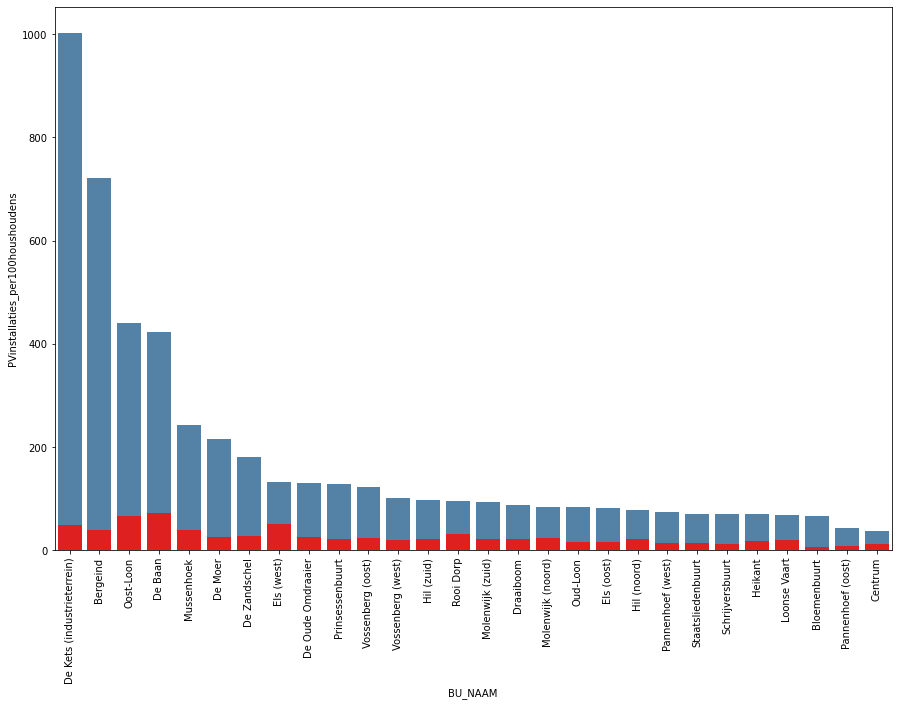

In [28]:
plt.figure(figsize = (15,10))
sns.barplot(data = df_2022, x = df_2022.index, y = 'Opgesteld_vermogen_per100houshoudens', color = 'SteelBlue')
sns.barplot(data = df_2022, x = df_2022.index, y = 'PVinstallaties_per100houshoudens', color = 'Red')
plt.xticks(rotation = 90)
plt.show()

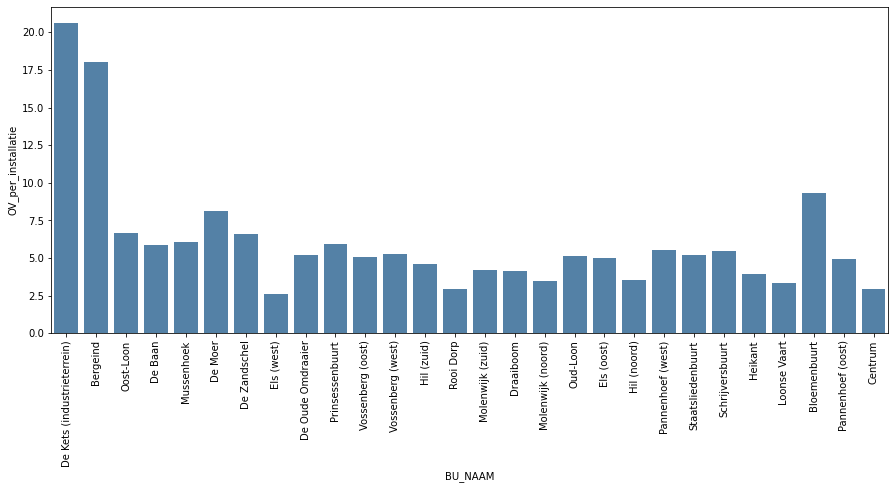

In [29]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'OV_per_installatie', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

The highest OV per installatie is in the buurt with "industrieterrein" in the name. Another key to filter out buurten contaminated by commercial PV's.

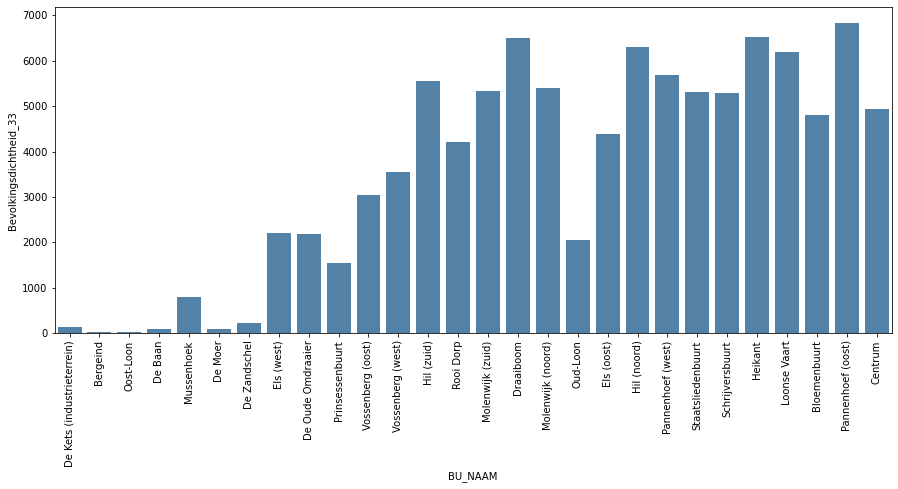

In [30]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'Bevolkingsdichtheid_33', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

Extremely low population density in areas with high installed PV. Let's take a closer look

<AxesSubplot:xlabel='Bevolkingsdichtheid_33', ylabel='OV_per_installatie'>

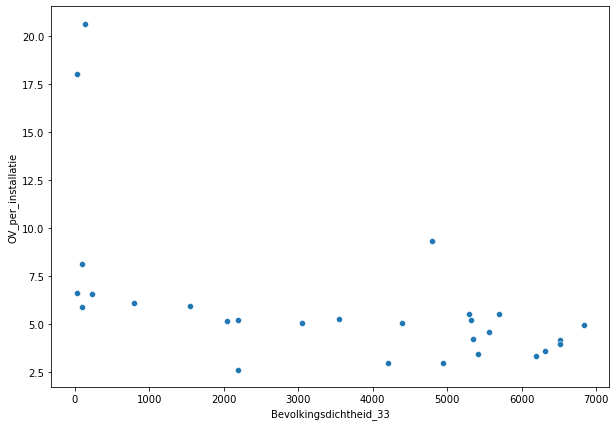

In [31]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = df_2022, x = 'Bevolkingsdichtheid_33', y = 'OV_per_installatie')

There is an inverse correlation of average OV with population density, but the two points with highest OV are obvious outliers.

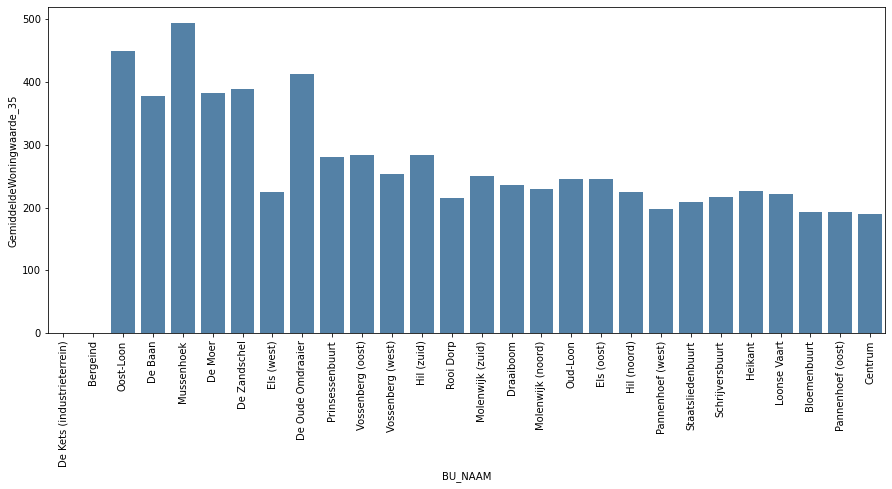

In [32]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'GemiddeldeWoningwaarde_35', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

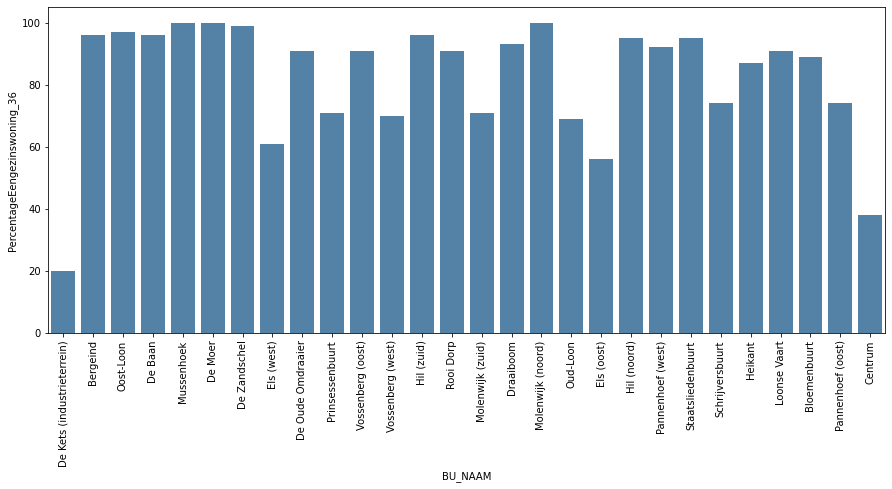

In [33]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'PercentageEengezinswoning_36', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

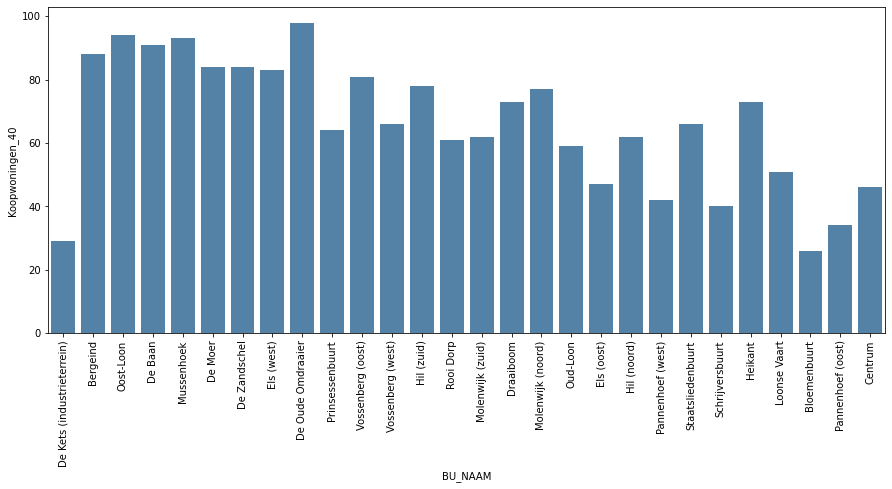

In [34]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'Koopwoningen_40', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

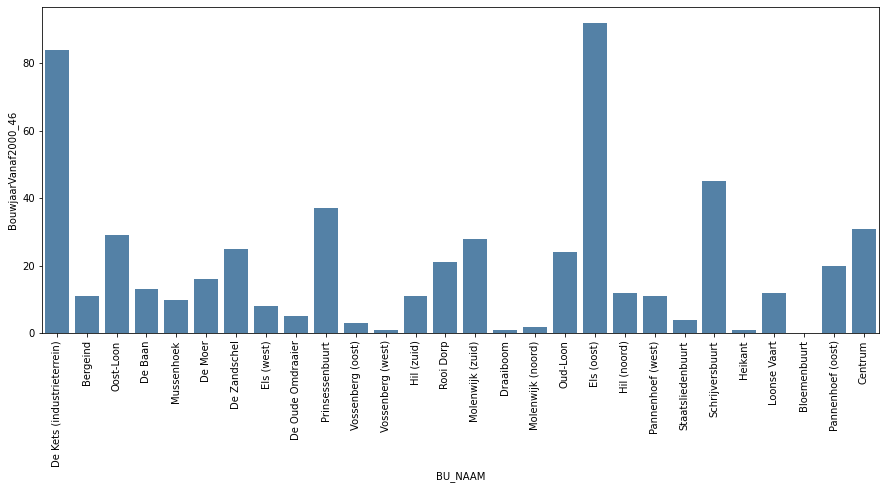

In [35]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'BouwjaarVanaf2000_46', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

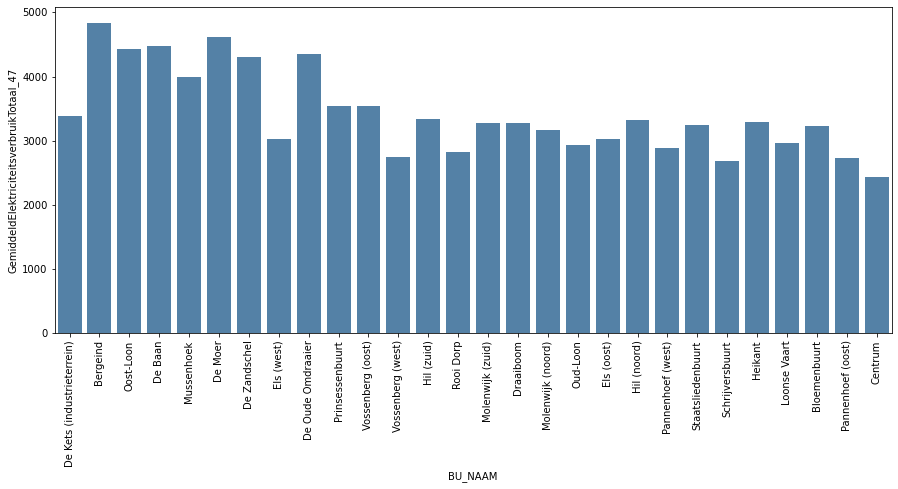

In [36]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'GemiddeldElektriciteitsverbruikTotaal_47', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

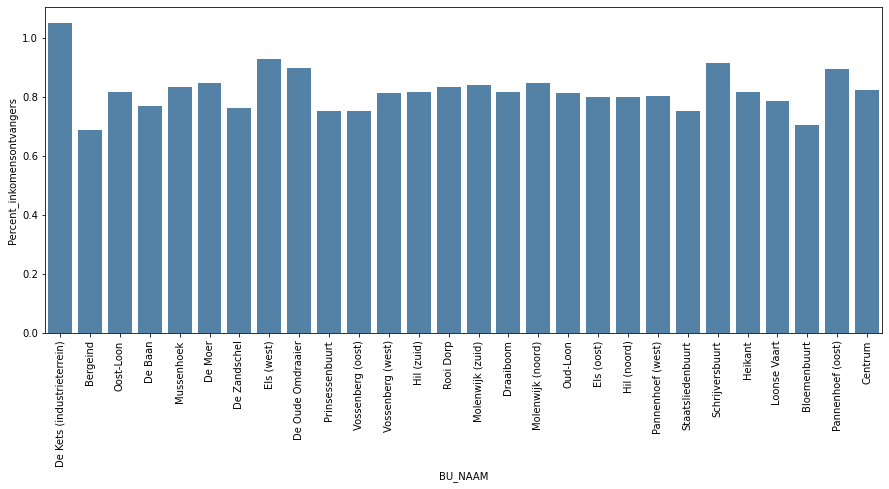

In [37]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'Percent_inkomensontvangers', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

In one case the "Percent inkomensontvangers" is larger than 1. Is it possible or is it a mistake?

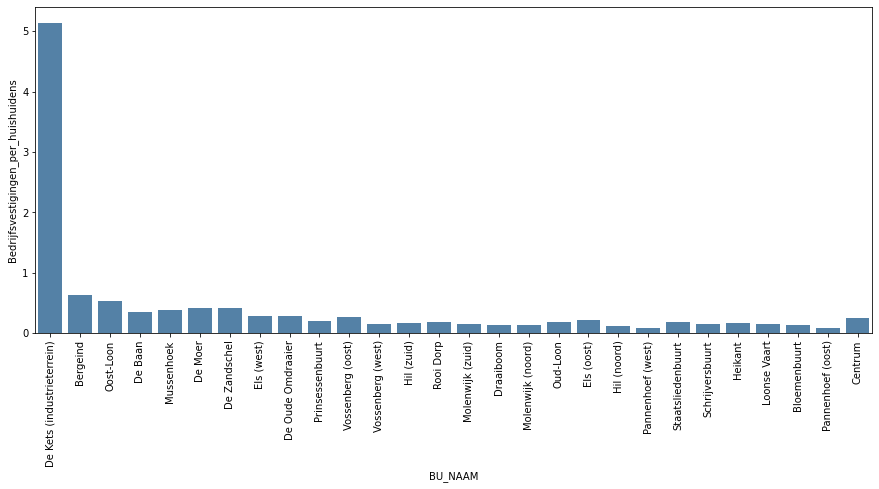

In [38]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'Bedrijfsvestigingen_per_huishuidens', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

Again, buurten with high average OV capacity also have typically high number of firms. This is another argument to consider such buurten as not typically residential and therefore filter them off. Let's visualize this correlation.

<AxesSubplot:xlabel='Bedrijfsvestigingen_per_huishuidens', ylabel='OV_per_installatie'>

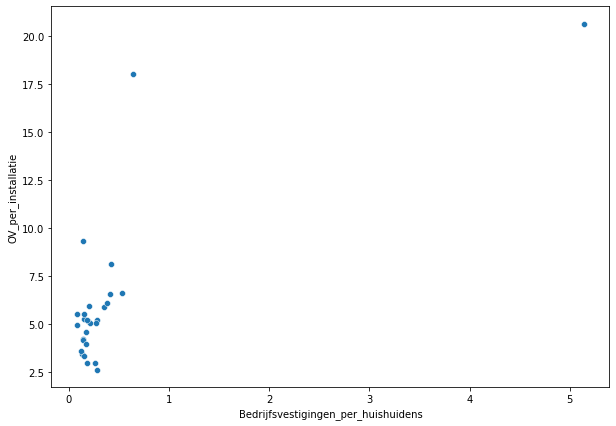

In [39]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = df_2022, x = 'Bedrijfsvestigingen_per_huishuidens', y = 'OV_per_installatie')

Let's investigate the outliers, i.e. buurten with OV > 8 and Bedrijfsvestigingen > 0.8

In [40]:
df_2022[(df_2022['Bedrijfsvestigingen_per_huishuidens'] > 0.8) | (df_2022['OV_per_installatie'] > 8)].T

BU_NAAM,De Kets (industrieterrein),Bergeind,De Moer,Bloemenbuurt
Aantal aansluitingen met opwekinstallatie,17.000000,22.000000,62.000000,13.000000
Opgesteld vermogen,351.000000,397.000000,505.000000,121.000000
OV_per_installatie,20.647059,18.045455,8.145161,9.307692
MeestVoorkomendePostcode_113,5171.000000,5175.000000,5176.000000,5171.000000
HuishoudensTotaal_28,35.000000,55.000000,235.000000,180.000000
GemiddeldeHuishoudensgrootte_32,2.100000,2.600000,2.500000,2.200000
Bevolkingsdichtheid_33,135.000000,29.000000,97.000000,4802.000000
GemiddeldeWoningwaarde_35,NaN,NaN,382.000000,193.000000
PercentageEengezinswoning_36,20.000000,96.000000,100.000000,89.000000
Koopwoningen_40,29.000000,88.000000,84.000000,26.000000


The latter two buurten are rather typical, so probably the criterion of OV > 8 is too strict, and can be increased to 10. 

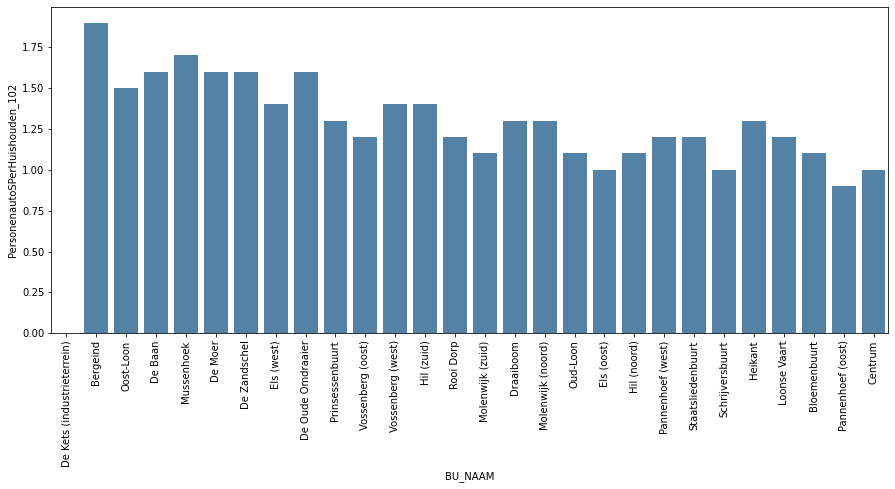

In [41]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'PersonenautoSPerHuishouden_102', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

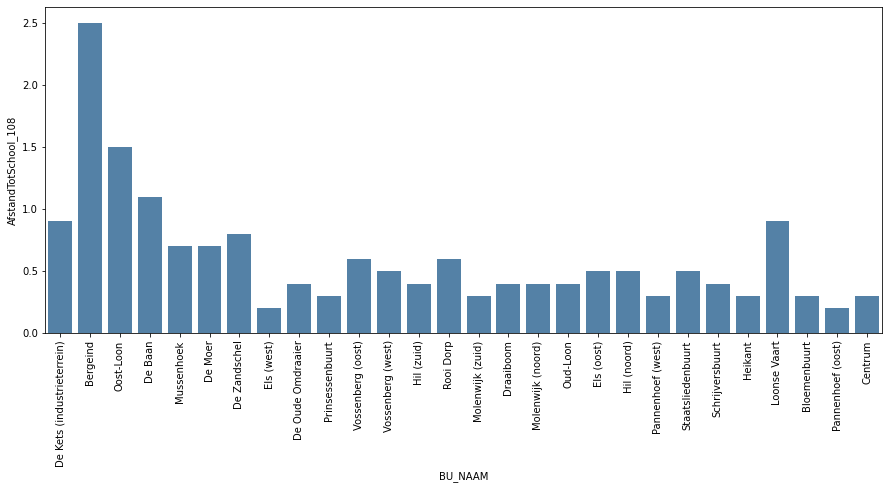

In [42]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'AfstandTotSchool_108', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

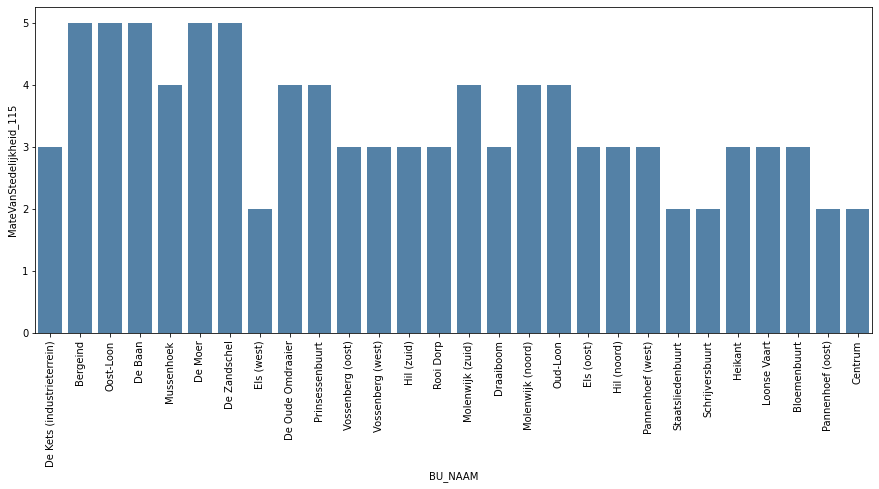

In [43]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'MateVanStedelijkheid_115', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

In [44]:
corr_matrix = df_2022.corr().sort_values(by = 'Opgesteld_vermogen_per100houshoudens', ascending = False).transpose()
corr_matrix = corr_matrix.sort_values(by = 'Opgesteld_vermogen_per100houshoudens', ascending = False)

<AxesSubplot:>

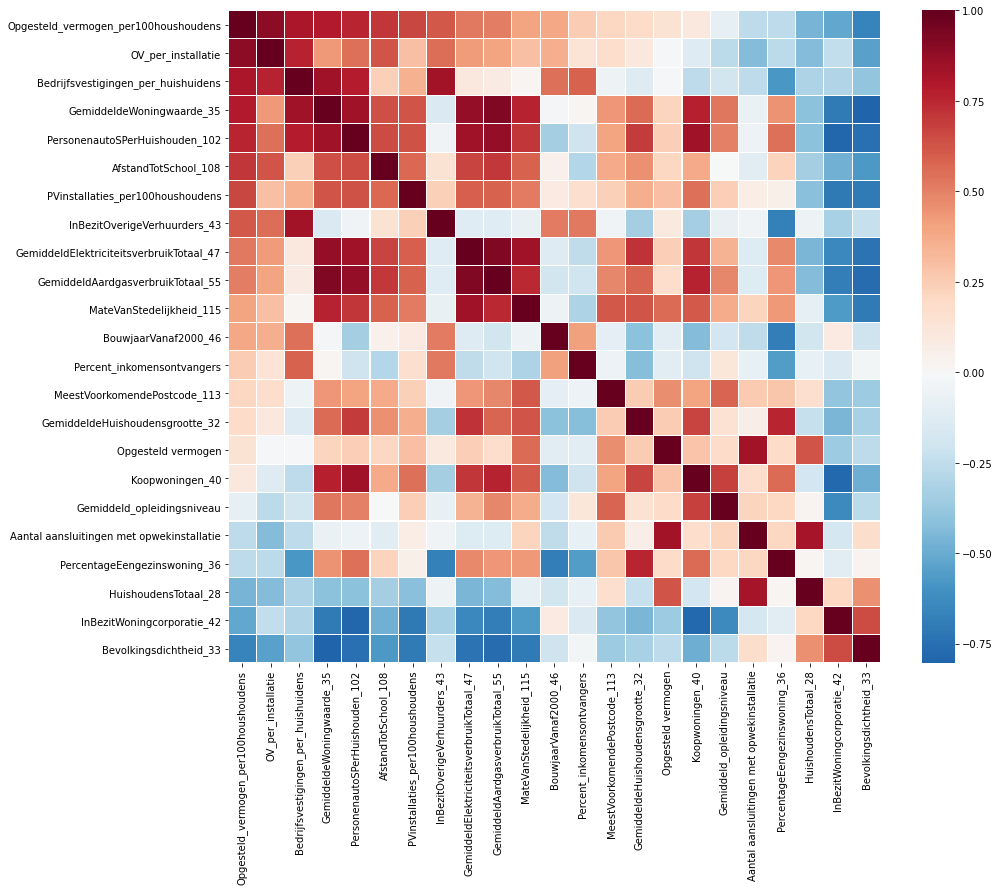

In [45]:
plt.figure(figsize = (15,12))
sns.heatmap(data = corr_matrix, annot = False, fmt='.2f', cmap = 'RdBu_r', linewidths=.1, square=True, vmax=1, center = 0)

In [46]:
#fig, ax = plt.subplots(3, 4, figsize=(15,10))
#for i, col in enumerate(df_2022.values):
#    _ax=ax[i // 4, i % 4]
#    sns.barplot(x='BU_NAAM', y=col, data=df_2022, ax=_ax)
#plt.subplots_adjust(wspace=0.4, hspace=0.4)
#plt.show()

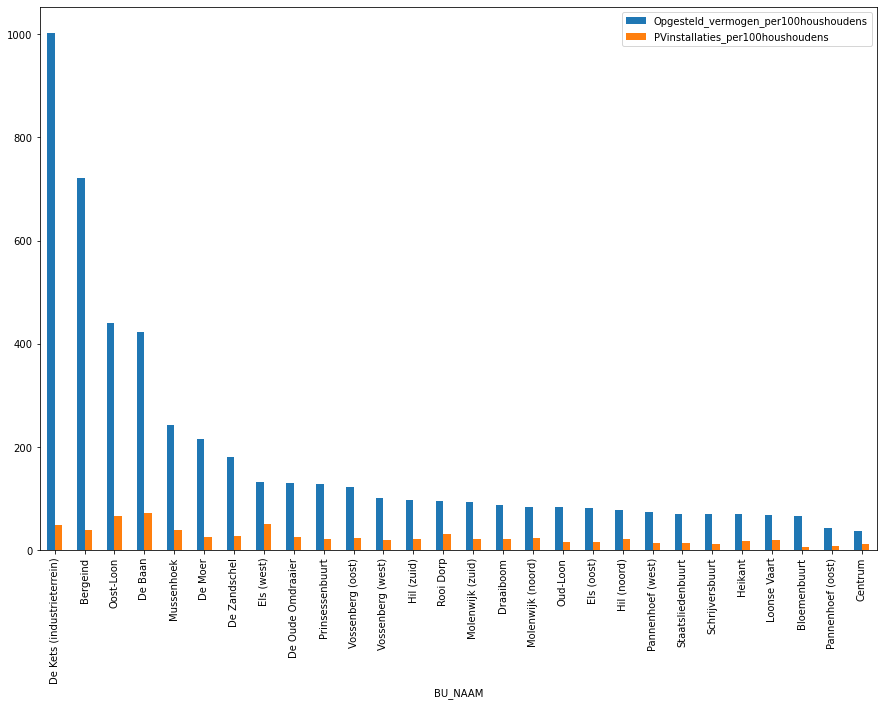

In [47]:
ax = df_2022[['Opgesteld_vermogen_per100houshoudens', 'PVinstallaties_per100houshoudens']].plot.bar(figsize = (15,10))

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

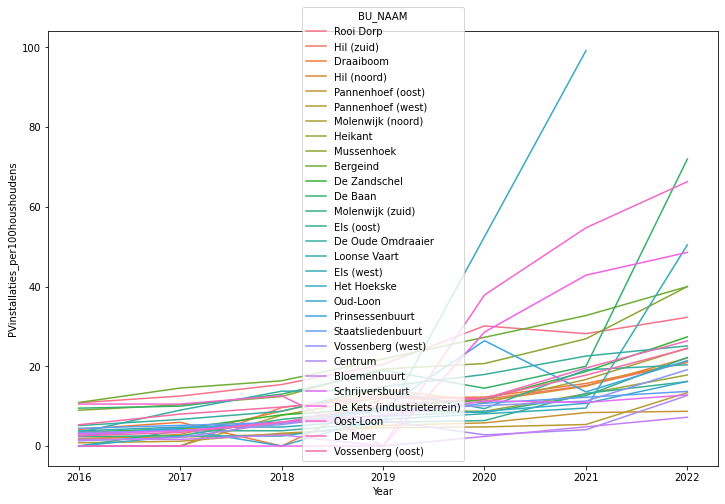

In [48]:
plt.figure(figsize = (12,8))
sns.lineplot(data = df, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = 'BU_NAAM')

It remains to explain why for some buurten is the number of installations apparently decreasing

In [49]:
table_Bosch1 = df.groupby('Year').mean()
#table_PV1 = table_PV1.reset_index()

In [50]:
table_Bosch1.T

Year,2016,2017,2018,2019,2020,2021,2022
Aantal aansluitingen met opwekinstallatie,10.931034,15.931034,21.379310,34.793103,42.461538,55.821429,76.571429
Opgesteld vermogen,41.310345,57.344828,72.172414,129.103448,189.038462,248.071429,379.142857
OV_per_installatie,4.281229,4.480244,4.294895,4.317045,5.504357,5.260993,6.069230
MeestVoorkomendePostcode_113,5172.068966,5172.068966,5172.068966,5172.068966,5172.192308,5172.107143,5172.107143
HuishoudensTotaal_28,344.827586,344.827586,344.827586,344.827586,369.038462,350.714286,352.857143
GemiddeldeHuishoudensgrootte_32,2.327586,2.327586,2.327586,2.327586,2.334615,2.332143,2.321429
Bevolkingsdichtheid_33,3425.620690,3425.620690,3425.620690,3425.620690,3550.384615,3376.464286,3546.750000
GemiddeldeWoningwaarde_35,282.740741,282.740741,282.740741,282.740741,279.333333,286.192308,273.923077
PercentageEengezinswoning_36,82.758621,82.758621,82.758621,82.758621,82.807692,82.535714,82.250000
Koopwoningen_40,66.620690,66.620690,66.620690,66.620690,67.038462,68.071429,66.142857


<AxesSubplot:xlabel='Year', ylabel='Opgesteld_vermogen_per100houshoudens'>

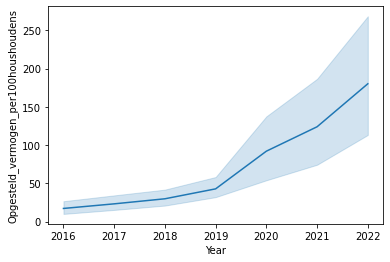

In [51]:
sns.lineplot(data = df, x = 'Year', y = 'Opgesteld_vermogen_per100houshoudens')

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

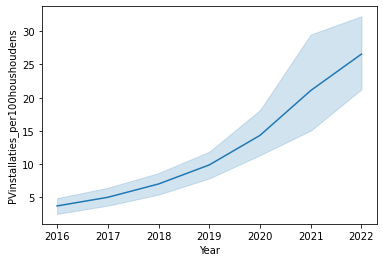

In [52]:
sns.lineplot(data = df, x = 'Year', y = 'PVinstallaties_per100houshoudens')

### EDA of PV installed capacity as a function of demographic features

<a id='total'></a>
#### 1. Total number of installations as function of time

In [53]:
table_PV1 = df.groupby('Year').mean()
table_PV1 = table_PV1.reset_index()

In [54]:
table_PV1

,Year,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,PercentageEengezinswoning_36,...,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2016,10.931034,41.310345,4.281229,5172.068966,344.827586,2.327586,3425.620690,282.740741,82.758621,...,3492.068966,1516.896552,1.916314,0.825850,0.416679,1.317857,0.637931,3.448276,17.092684,3.702758
1,2017,15.931034,57.344828,4.480244,5172.068966,344.827586,2.327586,3425.620690,282.740741,82.758621,...,3492.068966,1516.896552,1.916314,0.825850,0.416679,1.317857,0.637931,3.448276,23.112906,5.002544
2,2018,21.379310,72.172414,4.294895,5172.068966,344.827586,2.327586,3425.620690,282.740741,82.758621,...,3492.068966,1516.896552,1.916314,0.825850,0.416679,1.317857,0.637931,3.448276,29.727460,7.009508
3,2019,34.793103,129.103448,4.317045,5172.068966,344.827586,2.327586,3425.620690,282.740741,82.758621,...,3492.068966,1516.896552,1.916314,0.825850,0.416679,1.317857,0.637931,3.448276,42.716210,9.875067
4,2020,42.461538,189.038462,5.504357,5172.192308,369.038462,2.334615,3550.384615,279.333333,82.807692,...,3446.538462,1510.384615,1.915056,0.821582,0.429196,1.308000,0.630769,3.461538,91.980894,14.321840
5,2021,55.821429,248.071429,5.260993,5172.107143,350.714286,2.332143,3376.464286,286.192308,82.535714,...,3501.428571,1528.928571,1.926286,0.830134,0.426600,1.325926,0.650000,3.464286,123.904141,21.068594
6,2022,76.571429,379.142857,6.069230,5172.107143,352.857143,2.321429,3546.750000,273.923077,82.250000,...,3423.928571,1493.928571,1.913214,0.821331,0.413703,1.303704,0.603571,3.392857,180.134815,26.559082


<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

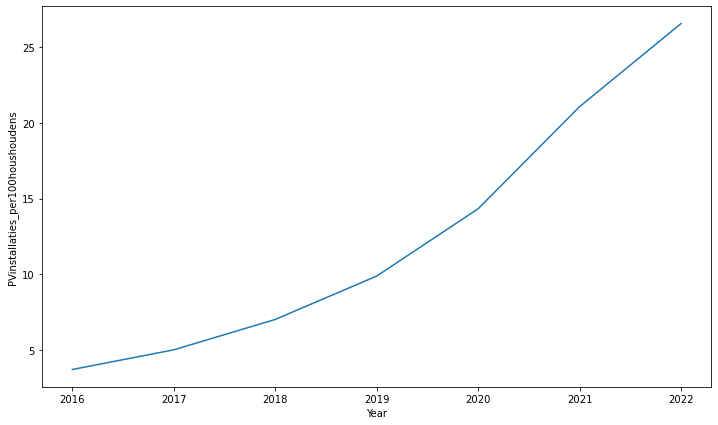

In [55]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV1, x = 'Year', y = 'PVinstallaties_per100houshoudens')

In [56]:
table_PV2 = df.groupby(['Year', 'MateVanStedelijkheid_115']).mean()
table_PV2 = table_PV2.reset_index()

In [57]:
table_PV2.head()

,Year,MateVanStedelijkheid_115,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,BouwjaarVanaf2000_46,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2016,2.0,7.200000,35.600000,4.950000,5171.000000,283.000000,2.120000,4916.400000,206.400000,...,21.600000,2824.000000,1216.000000,1.812779,0.863719,0.192111,1.100000,0.320000,13.125203,2.899729
1,2016,3.0,13.083333,38.500000,3.264441,5171.166667,384.583333,2.300000,4742.916667,234.545455,...,20.750000,3151.666667,1300.000000,1.868708,0.816933,0.578539,1.218182,0.516667,8.462689,2.861121
2,2016,4.0,12.500000,44.166667,3.472591,5173.666667,505.833333,2.300000,2887.500000,318.833333,...,17.666667,3541.666667,1641.666667,2.081617,0.831573,0.221569,1.350000,0.416667,12.162953,3.596838
3,2016,5.0,8.166667,48.833333,6.251316,5173.166667,155.833333,2.583333,86.833333,421.800000,...,17.500000,4680.000000,2076.666667,1.935738,0.806402,0.475209,1.650000,1.366667,42.588639,6.161143
4,2017,2.0,9.200000,42.400000,4.731429,5171.000000,283.000000,2.120000,4916.400000,206.400000,...,21.600000,2824.000000,1216.000000,1.812779,0.863719,0.192111,1.100000,0.320000,16.391483,3.625855


<AxesSubplot:xlabel='Year', ylabel='Opgesteld vermogen'>

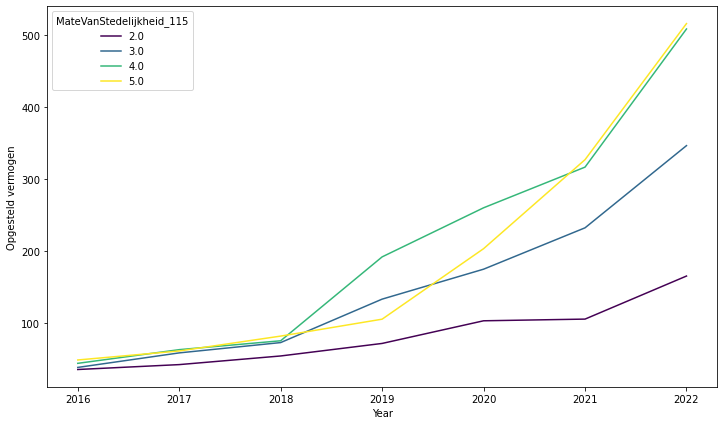

In [58]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'Opgesteld vermogen', hue = 'MateVanStedelijkheid_115', palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='OV_per_installatie'>

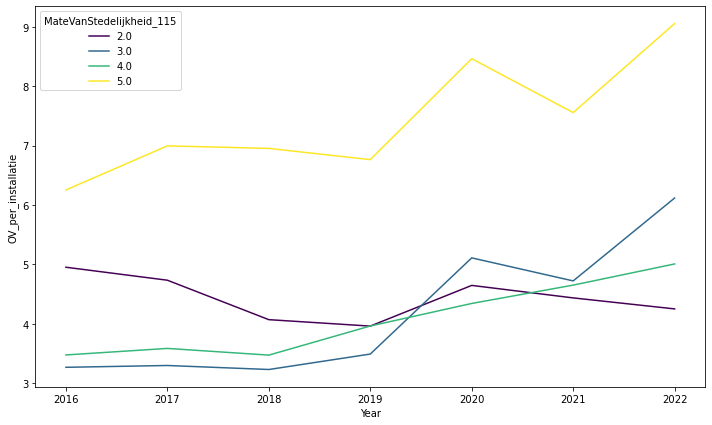

In [59]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'OV_per_installatie', hue = 'MateVanStedelijkheid_115', palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='Opgesteld_vermogen_per100houshoudens'>

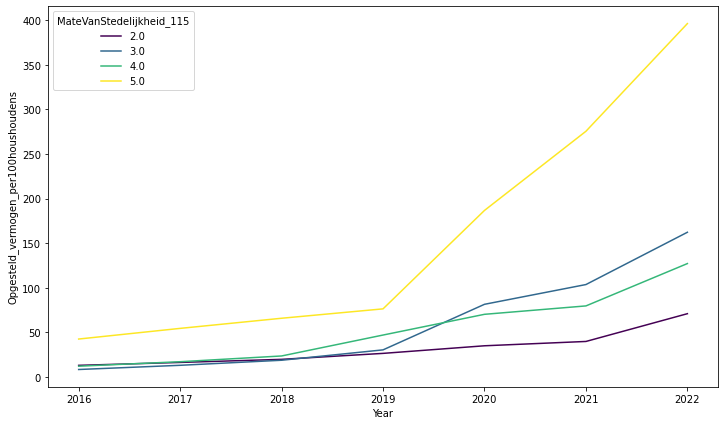

In [60]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'Opgesteld_vermogen_per100houshoudens', hue = 'MateVanStedelijkheid_115', 
             palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

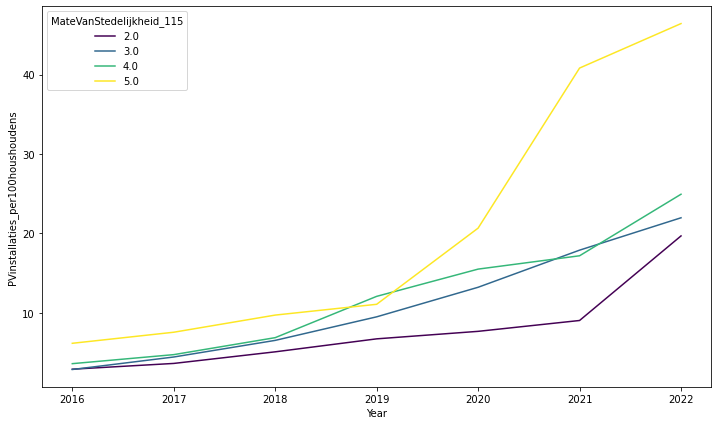

In [61]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = 'MateVanStedelijkheid_115', 
             palette = "viridis")

<a id='koop'></a>
#### 2. Percentage of privately owned houses

In [62]:
bins = [0, 20, 40, 60, 80, np.inf]
names = ['<20', '21-40', '41-60', '61-80', '81-100']

df['%_Koopwoningen'] = pd.cut(df['Koopwoningen_40'], bins, labels=names)

In [63]:
table_PV3 = df.groupby(['Year', '%_Koopwoningen']).mean()
table_PV3 = table_PV3.reset_index()

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

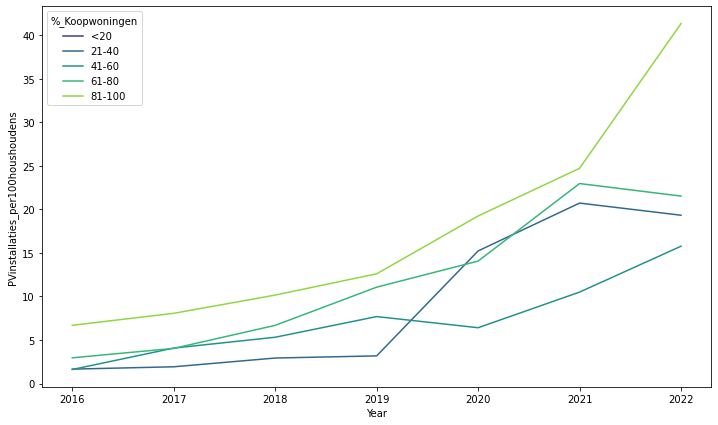

In [64]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV3, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = '%_Koopwoningen', 
             palette = "viridis")

<a id='een'></a>
#### 3. Percentage of one family houses

In [65]:
bins = [0, 20, 40, 60, 80, np.inf]
names = ['<20', '21-40', '41-60', '61-80', '81-100']

df['Perc_Eengezinswoning'] = pd.cut(df['PercentageEengezinswoning_36'], bins, labels=names)
df.head()

,Year,BU_NAAM,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens,%_Koopwoningen,Perc_Eengezinswoning
16165,2016,Rooi Dorp,45.0,76.0,1.688889,5171,415,2.3,4207.0,215.0,...,1.794521,0.833333,0.180723,1.2,0.6,3.0,18.313253,10.843373,61-80,81-100
16035,2016,Hil (zuid),0.0,0.0,NaN,5172,290,2.5,5562.0,283.0,...,2.033333,0.816327,0.172414,1.4,0.4,3.0,0.000000,0.000000,61-80,81-100
16017,2016,Draaiboom,33.0,127.0,3.848485,5172,790,2.5,6507.0,236.0,...,1.962264,0.818414,0.139241,1.3,0.4,3.0,16.075949,4.177215,61-80,81-100
16026,2016,Hil (noord),4.0,12.0,3.000000,5171,240,2.5,6307.0,224.0,...,1.880000,0.800000,0.125000,1.1,0.5,3.0,5.000000,1.666667,61-80,81-100
16053,2016,Pannenhoef (oost),6.0,42.0,7.000000,5171,310,2.2,6837.0,193.0,...,1.640000,0.895522,0.080645,0.9,0.2,2.0,13.548387,1.935484,21-40,61-80


In [66]:
table_PV4 = df.groupby(['Year', 'Perc_Eengezinswoning']).mean()
table_PV4 = table_PV4.reset_index()

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

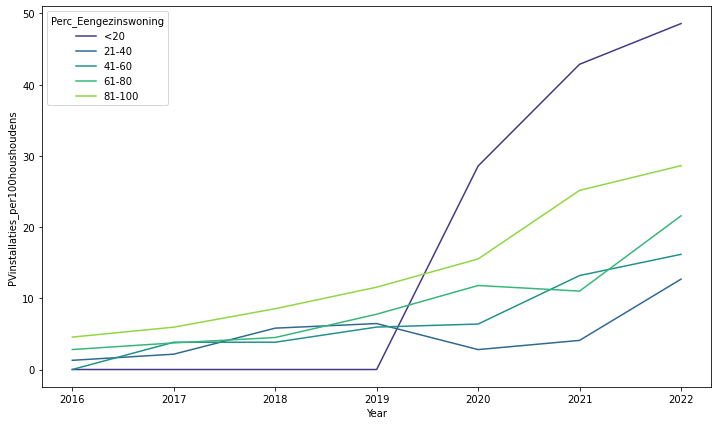

In [67]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV4, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = 'Perc_Eengezinswoning', 
             palette = "viridis")

very strange pattern of the <20 curve. Let's have a look 

In [68]:
df[df['Perc_Eengezinswoning'] == '<20']

,Year,BU_NAAM,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens,%_Koopwoningen,Perc_Eengezinswoning
16112,2016,De Kets (industrieterrein),0.0,0.0,NaN,5171,35,2.1,135.0,NaN,...,1.714286,1.052632,5.142857,NaN,0.9,3.0,0.000000,0.000000,21-40,<20
16111,2017,De Kets (industrieterrein),0.0,0.0,NaN,5171,35,2.1,135.0,NaN,...,1.714286,1.052632,5.142857,NaN,0.9,3.0,0.000000,0.000000,21-40,<20
16110,2018,De Kets (industrieterrein),0.0,0.0,NaN,5171,35,2.1,135.0,NaN,...,1.714286,1.052632,5.142857,NaN,0.9,3.0,0.000000,0.000000,21-40,<20
16109,2019,De Kets (industrieterrein),0.0,0.0,NaN,5171,35,2.1,135.0,NaN,...,1.714286,1.052632,5.142857,NaN,0.9,3.0,0.000000,0.000000,21-40,<20
16113,2020,De Kets (industrieterrein),10.0,167.0,16.700000,5171,35,2.1,135.0,NaN,...,1.714286,1.052632,5.142857,NaN,0.9,3.0,477.142857,28.571429,21-40,<20
16115,2021,De Kets (industrieterrein),15.0,203.0,13.533333,5171,35,2.1,135.0,NaN,...,1.714286,1.052632,5.142857,NaN,0.9,3.0,580.000000,42.857143,21-40,<20
16117,2022,De Kets (industrieterrein),17.0,351.0,20.647059,5171,35,2.1,135.0,NaN,...,1.714286,1.052632,5.142857,NaN,0.9,3.0,1002.857143,48.571429,21-40,<20


Now, it is clear. It shows how a single atypical buurt can skew the total picture.

Let's now investigate the "21-40" curve which also shows strange behavior, in 2020 PV decreases

In [70]:
df[df['Perc_Eengezinswoning'] == '21-40'].T

,16067,16066,16065,16064,16068,16070,16072
Year,2016,2017,2018,2019,2020,2021,2022
BU_NAAM,Centrum,Centrum,Centrum,Centrum,Centrum,Centrum,Centrum
Aantal aansluitingen met opwekinstallatie,6.0,10.0,27.0,30.0,13.0,19.0,59.0
Opgesteld vermogen,29.0,38.0,69.0,81.0,59.0,86.0,175.0
OV_per_installatie,4.833333,3.8,2.555556,2.7,4.538462,4.526316,2.966102
MeestVoorkomendePostcode_113,5171,5171,5171,5171,5171,5171,5171
HuishoudensTotaal_28,465,465,465,465,465,465,465
GemiddeldeHuishoudensgrootte_32,1.8,1.8,1.8,1.8,1.8,1.8,1.8
Bevolkingsdichtheid_33,4938.0,4938.0,4938.0,4938.0,4938.0,4938.0,4938.0
GemiddeldeWoningwaarde_35,189.0,189.0,189.0,189.0,189.0,189.0,189.0


No easy explanation here. It has to be checked if the size of the buurt has not changed, e.g. some part of the buurt split out to form a different buurt. Otherwise, the change can be related to another dataset. Since 2020 data come from Enexis.

<a id='pv2022'></a>
#### 4. Housholds with PV per 100 households in 2022

In [71]:
df2022 = df[df['Year'] == '2022']

In [72]:
df2022

,Year,BU_NAAM,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens,%_Koopwoningen,Perc_Eengezinswoning
16022,2022,Draaiboom,166.0,691.0,4.162651,5172,790,2.5,6507.0,236.0,...,1.962264,0.818414,0.139241,1.3,0.4,3.0,87.468354,21.012658,61-80,81-100
16031,2022,Hil (noord),53.0,189.0,3.566038,5171,240,2.5,6307.0,224.0,...,1.880000,0.800000,0.125000,1.1,0.5,3.0,78.750000,22.083333,61-80,81-100
16239,2022,Molenwijk (zuid),130.0,548.0,4.215385,5175,585,2.2,5342.0,250.0,...,2.160920,0.842912,0.145299,1.1,0.3,4.0,93.675214,22.222222,61-80,61-80
16230,2022,Molenwijk (noord),156.0,538.0,3.448718,5175,635,2.4,5408.0,230.0,...,2.084034,0.846906,0.133858,1.3,0.4,4.0,84.724409,24.566929,61-80,81-100
16221,2022,Mussenhoek,58.0,352.0,6.068966,5175,145,2.5,791.0,494.0,...,2.275862,0.833333,0.379310,1.7,0.7,4.0,242.758621,40.000000,81-100,81-100
16212,2022,Oud-Loon,194.0,1002.0,5.164948,5175,1195,2.1,2045.0,245.0,...,1.950000,0.815534,0.192469,1.1,0.4,4.0,83.849372,16.234310,41-60,61-80
16197,2022,Prinsessenbuurt,60.0,357.0,5.950000,5171,280,2.3,1551.0,281.0,...,1.880000,0.751880,0.196429,1.3,0.3,4.0,127.500000,21.428571,61-80,61-80
16188,2022,De Oude Omdraaier,49.0,254.0,5.183673,5171,195,2.3,2188.0,413.0,...,2.138889,0.898876,0.282051,1.6,0.4,4.0,130.256410,25.128205,81-100,81-100
16179,2022,Loonse Vaart,163.0,546.0,3.349693,5171,800,2.2,6190.0,222.0,...,1.851064,0.786517,0.156250,1.2,0.9,3.0,68.250000,20.375000,41-60,81-100
16170,2022,Rooi Dorp,134.0,396.0,2.955224,5171,415,2.3,4207.0,215.0,...,1.794521,0.833333,0.180723,1.2,0.6,3.0,95.421687,32.289157,61-80,81-100


In [73]:
bins = [0, 20, 40, 60, 80, 100, np.inf]
names = ['<20', '21-40', '41-60', '61-80', '81-100', '>100']

df2022['PVinstallaties_per100houshoudens_groups'] = pd.cut(df2022['PVinstallaties_per100houshoudens'], bins, labels=names)

In [74]:
df2022 = df2022[['BU_NAAM', 'PVinstallaties_per100houshoudens_groups']]

In [75]:
df2022.head()

,BU_NAAM,PVinstallaties_per100houshoudens_groups
16022,Draaiboom,21-40
16031,Hil (noord),21-40
16239,Molenwijk (zuid),21-40
16230,Molenwijk (noord),21-40
16221,Mussenhoek,21-40


In [76]:
df = df.merge(df2022, left_on= 'BU_NAAM', right_on = 'BU_NAAM')

In [77]:
df.head()

,Year,BU_NAAM,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens,%_Koopwoningen,Perc_Eengezinswoning,PVinstallaties_per100houshoudens_groups
0,2016,Rooi Dorp,45.0,76.0,1.688889,5171,415,2.3,4207.0,215.0,...,0.833333,0.180723,1.2,0.6,3.0,18.313253,10.843373,61-80,81-100,21-40
1,2017,Rooi Dorp,52.0,89.0,1.711538,5171,415,2.3,4207.0,215.0,...,0.833333,0.180723,1.2,0.6,3.0,21.445783,12.530120,61-80,81-100,21-40
2,2018,Rooi Dorp,64.0,121.0,1.890625,5171,415,2.3,4207.0,215.0,...,0.833333,0.180723,1.2,0.6,3.0,29.156627,15.421687,61-80,81-100,21-40
3,2019,Rooi Dorp,85.0,161.0,1.894118,5171,415,2.3,4207.0,215.0,...,0.833333,0.180723,1.2,0.6,3.0,38.795181,20.481928,61-80,81-100,21-40
4,2020,Rooi Dorp,125.0,249.0,1.992000,5171,415,2.3,4207.0,215.0,...,0.833333,0.180723,1.2,0.6,3.0,60.000000,30.120482,61-80,81-100,21-40


In [78]:
df['PVinstallaties_per100houshoudens'].nlargest(5)

83     72.000000
178    66.315789
177    54.736842
117    50.476190
171    48.571429
Name: PVinstallaties_per100houshoudens, dtype: float64

In [80]:
df[df['PVinstallaties_per100houshoudens'].isin(df['PVinstallaties_per100houshoudens'].nlargest(5))].transpose()

,83,117,171,177,178
Year,2022,2022,2022,2021,2022
BU_NAAM,De Baan,Els (west),De Kets (industrieterrein),Oost-Loon,Oost-Loon
Aantal aansluitingen met opwekinstallatie,144.0,53.0,17.0,52.0,63.0
Opgesteld vermogen,846.0,139.0,351.0,353.0,418.0
OV_per_installatie,5.875,2.622642,20.647059,6.788462,6.634921
MeestVoorkomendePostcode_113,5171,5171,5171,5175,5175
HuishoudensTotaal_28,200,105,35,95,95
GemiddeldeHuishoudensgrootte_32,2.6,2.1,2.1,2.5,2.5
Bevolkingsdichtheid_33,101.0,2197.0,135.0,29.0,29.0
GemiddeldeWoningwaarde_35,377.0,225.0,NaN,449.0,449.0


In [81]:
df['PVinstallaties_per100houshoudens_groups'].value_counts()

21-40     98
<20       68
61-80     14
41-60     13
81-100     0
>100       0
Name: PVinstallaties_per100houshoudens_groups, dtype: int64

In [82]:
table_PV5 = df.groupby(['Year', 'PVinstallaties_per100houshoudens_groups']).mean()
table_PV5 = table_PV5.reset_index()

In [83]:
table_PV5

,Year,PVinstallaties_per100houshoudens_groups,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2016,<20,9.900000,40.500000,4.409498,5171.400000,432.500000,2.180000,4938.600000,216.800000,...,2920.000000,1205.000000,1.799642,0.814515,0.162662,1.120000,0.370000,2.700000,9.504392,2.222112
1,2016,21-40,13.214286,44.000000,4.077703,5172.642857,365.714286,2.421429,3390.071429,300.230769,...,3667.857143,1646.428571,2.004181,0.805978,0.260870,1.392857,0.678571,3.785714,19.604444,4.380215
2,2016,41-60,2.000000,5.000000,2.500000,5171.000000,70.000000,2.100000,1166.000000,225.000000,...,3205.000000,1390.000000,1.923810,0.991432,2.714286,1.400000,0.550000,2.500000,4.761905,1.904762
3,2016,61-80,14.500000,83.500000,5.815789,5173.000000,147.500000,2.550000,65.000000,413.000000,...,4455.000000,1975.000000,1.879199,0.792779,0.438158,1.550000,1.300000,5.000000,58.328947,10.013158
4,2016,81-100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016,>100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,<20,14.600000,55.800000,4.119524,5171.400000,432.500000,2.180000,4938.600000,216.800000,...,2920.000000,1205.000000,1.799642,0.814515,0.162662,1.120000,0.370000,2.700000,13.053437,3.237341
7,2017,21-40,19.857143,63.285714,4.118704,5172.642857,365.714286,2.421429,3390.071429,300.230769,...,3667.857143,1646.428571,2.004181,0.805978,0.260870,1.392857,0.678571,3.785714,26.987151,6.065153
8,2017,41-60,2.500000,9.500000,3.800000,5171.000000,70.000000,2.100000,1166.000000,225.000000,...,3205.000000,1390.000000,1.923810,0.991432,2.714286,1.400000,0.550000,2.500000,9.047619,2.380952
9,2017,61-80,15.000000,84.000000,5.700000,5173.000000,147.500000,2.550000,65.000000,413.000000,...,4455.000000,1975.000000,1.879199,0.792779,0.438158,1.550000,1.300000,5.000000,58.578947,10.263158


(0.0, 100.0)

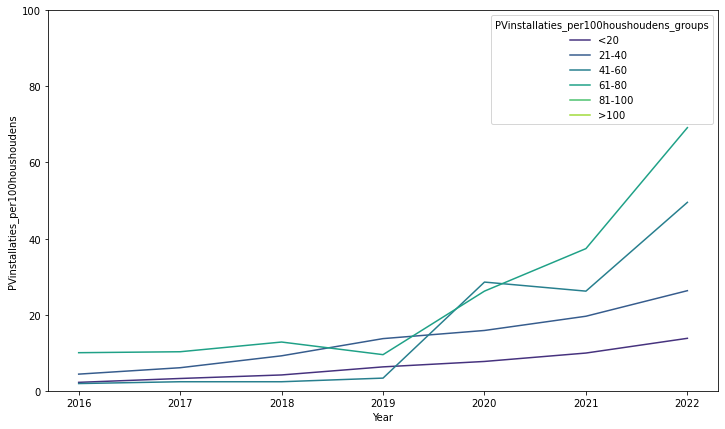

In [84]:
plt.figure(figsize = (12, 7))
ax = sns.lineplot(data = table_PV5, x = 'Year', y = 'PVinstallaties_per100houshoudens', 
             hue = 'PVinstallaties_per100houshoudens_groups', palette = "viridis")
ax.set_ylim([0, 100])

Let's try to find out the reason for decrease of PV number between 2020 and 2021 for group "41-60"

In [85]:
df[df['PVinstallaties_per100houshoudens_groups'] == '41-60']

,Year,BU_NAAM,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens,%_Koopwoningen,Perc_Eengezinswoning,PVinstallaties_per100houshoudens_groups
112,2016,Els (west),4.0,10.0,2.500000,5171,105,2.1,2197.0,225.0,...,0.930233,0.285714,1.4,0.2,2.0,9.523810,3.809524,81-100,61-80,41-60
113,2017,Els (west),5.0,19.0,3.800000,5171,105,2.1,2197.0,225.0,...,0.930233,0.285714,1.4,0.2,2.0,18.095238,4.761905,81-100,61-80,41-60
114,2018,Els (west),5.0,19.0,3.800000,5171,105,2.1,2197.0,225.0,...,0.930233,0.285714,1.4,0.2,2.0,18.095238,4.761905,81-100,61-80,41-60
115,2019,Els (west),7.0,26.0,3.714286,5171,105,2.1,2197.0,225.0,...,0.930233,0.285714,1.4,0.2,2.0,24.761905,6.666667,81-100,61-80,41-60
116,2021,Els (west),10.0,39.0,3.900000,5171,105,2.1,2197.0,225.0,...,0.930233,0.285714,1.4,0.2,2.0,37.142857,9.523810,81-100,61-80,41-60
117,2022,Els (west),53.0,139.0,2.622642,5171,105,2.1,2197.0,225.0,...,0.930233,0.285714,1.4,0.2,2.0,132.380952,50.476190,81-100,61-80,41-60
165,2016,De Kets (industrieterrein),0.0,0.0,NaN,5171,35,2.1,135.0,NaN,...,1.052632,5.142857,NaN,0.9,3.0,0.000000,0.000000,21-40,<20,41-60
166,2017,De Kets (industrieterrein),0.0,0.0,NaN,5171,35,2.1,135.0,NaN,...,1.052632,5.142857,NaN,0.9,3.0,0.000000,0.000000,21-40,<20,41-60
167,2018,De Kets (industrieterrein),0.0,0.0,NaN,5171,35,2.1,135.0,NaN,...,1.052632,5.142857,NaN,0.9,3.0,0.000000,0.000000,21-40,<20,41-60
168,2019,De Kets (industrieterrein),0.0,0.0,NaN,5171,35,2.1,135.0,NaN,...,1.052632,5.142857,NaN,0.9,3.0,0.000000,0.000000,21-40,<20,41-60


The reason can be seen clearly. For 2020, a record for Els (west) is missing. This resulted in artificial increase of the mean value. We can conclude that it is extremely important to clean data and deal with missing values. This also includes the missing records for a buurt in a given year. Although this is not a missing value by definition, it should be treated as such. It needs to be decided what to do in such case. To be sure no distorting impact, actually records of a given buurt from all years can be removed.

<a id='elec'></a>
#### 6. Average electricity consumption

<AxesSubplot:>

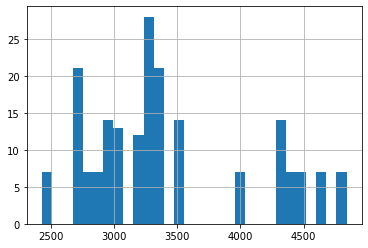

In [86]:
df['GemiddeldElektriciteitsverbruikTotaal_47'].hist(bins = 30)

In [87]:
bins = [0, 2500, 3000, 3500, 4000, 4500, np.inf]
names = ['<2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '>4500']

df['Elektriciteitsverbruik_bins'] = pd.cut(df['GemiddeldElektriciteitsverbruikTotaal_47'], bins, labels=names)
df.head().transpose()

,0,1,2,3,4
Year,2016,2017,2018,2019,2020
BU_NAAM,Rooi Dorp,Rooi Dorp,Rooi Dorp,Rooi Dorp,Rooi Dorp
Aantal aansluitingen met opwekinstallatie,45.0,52.0,64.0,85.0,125.0
Opgesteld vermogen,76.0,89.0,121.0,161.0,249.0
OV_per_installatie,1.688889,1.711538,1.890625,1.894118,1.992
MeestVoorkomendePostcode_113,5171,5171,5171,5171,5171
HuishoudensTotaal_28,415,415,415,415,415
GemiddeldeHuishoudensgrootte_32,2.3,2.3,2.3,2.3,2.3
Bevolkingsdichtheid_33,4207.0,4207.0,4207.0,4207.0,4207.0
GemiddeldeWoningwaarde_35,215.0,215.0,215.0,215.0,215.0


In [88]:
df['Elektriciteitsverbruik_bins'].value_counts()

3000-3500    74
2500-3000    49
4000-4500    28
3500-4000    21
>4500        14
<2500         7
Name: Elektriciteitsverbruik_bins, dtype: int64

In [89]:
table_PV7 = df.groupby(['Year', 'Elektriciteitsverbruik_bins']).mean()
table_PV7 = table_PV7.reset_index()

<AxesSubplot:xlabel='Year', ylabel='Opgesteld vermogen'>

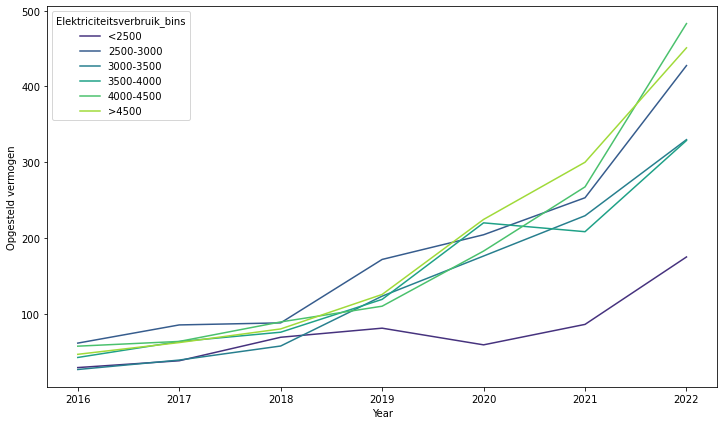

In [90]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV7, x = 'Year', y = 'Opgesteld vermogen', hue = 'Elektriciteitsverbruik_bins', 
             palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

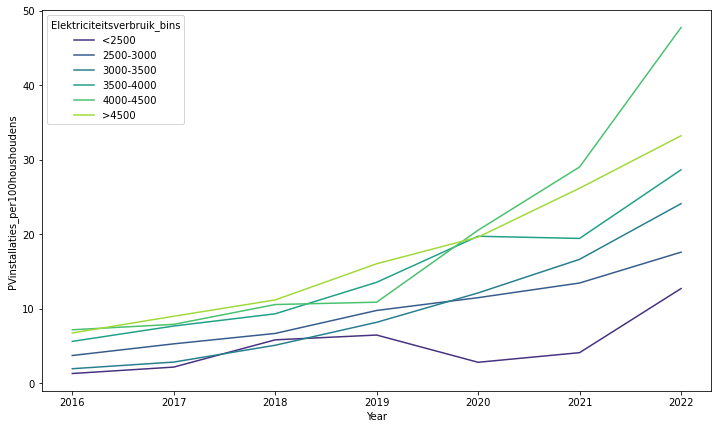

In [91]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV7, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = 'Elektriciteitsverbruik_bins', 
             palette = "viridis")

Apparent decrease in the number of installations has to be explained.